<a href="https://colab.research.google.com/github/ChitrarthVasdev/TASK-7-Get-Basic-Sales-Summary-from-a-Tiny-SQLite-Database-using-Python/blob/main/TASK_7_CODE_FILE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Step 1: Import Libraries

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
# Step 2: Create SQLite Database & Sales Table

conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Drop table if exists (to rerun cleanly)
cursor.execute("DROP TABLE IF EXISTS sales")

# Create table
cursor.execute('''
    CREATE TABLE sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')


In [12]:
# Step 3: Insert Larger Sample Data (100+ rows)

sample_sales = [
    ("T-shirt", 10, 15.0),
    ("T-shirt", 5, 15.0),
    ("Jeans", 8, 40.0),
    ("Hoodie", 3, 35.0),
    ("Cap", 12, 10.0),
    ("Hoodie", 4, 35.0),
    ("Jeans", 6, 40.0),
    ("Cap", 5, 10.0),
    ("Shoes", 7, 75.0),
    ("Shoes", 4, 75.0)
]

# Insert into the table
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_sales)
conn.commit()



In [16]:
# Step 4: Run SQL Query – Get Summary by Product

query = """
    SELECT
        product,
        SUM(quantity) AS total_qty,
        ROUND(SUM(quantity * price), 2) AS total_revenue
    FROM sales
    GROUP BY product
"""

# Execute and load into DataFrame
df = pd.read_sql_query(query, conn)

print("📊 Basic Sales Summary:\n")
print(df)



📊 Basic Sales Summary:

   product  total_qty  total_revenue
0      Cap         17          170.0
1   Hoodie          7          245.0
2    Jeans         14          560.0
3    Shoes         11          825.0
4  T-shirt         15          225.0


<Figure size 1000x600 with 0 Axes>

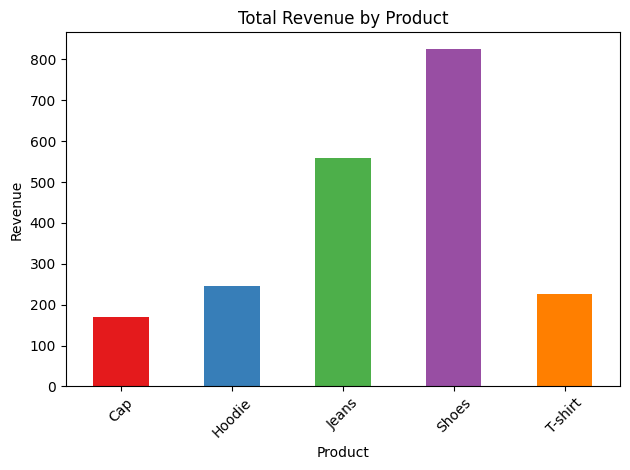

In [27]:
# Step 5: Plot Bar Chart of Revenue by Product

plt.figure(figsize=(10, 6))

# Generate a unique color for each bar (same length as number of products)
colors = plt.cm.Set1(range(len(df)))

df.plot(kind='bar',x='product',y='total_revenue',color=colors,legend=False)

plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()


In [28]:
# Step 6: Close the Connection

conn.close()
